In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [88]:
import seaborn as sns
import random
import warnings

warnings.filterwarnings('ignore')

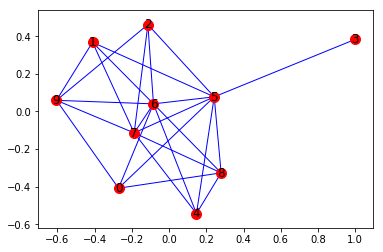

In [3]:
g = nx.barabasi_albert_graph (10,5)
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, cmap=plt.get_cmap('jet'), node_size = 100)
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g, pos, edge_color='b', arrows=True)
plt.show()

In [4]:
baGraph = nx.barabasi_albert_graph(100,5)

In [5]:
baGraph1 = baGraph.copy()

In [6]:
import random
list_id = baGraph.edges
#удалить 20% ребер
lower_bound = len(list_id) * 20 // 100
upper_bound = len(list_id) * 25 // 100

sampled = random.sample(list_id, random.randint(lower_bound, upper_bound))
#sampled содержит список удаленных ребер
#len(sampled)

In [7]:
baGraph.remove_edges_from(sampled)

In [8]:
#среднее и дисперсия для значений link predicton для удаленных связей

resource_alloc_index_deleted = []
preds = nx.resource_allocation_index(baGraph, sampled)
for u, v, p in preds:
    resource_alloc_index_deleted.append(p)
#len(resource_alloc_index)
rai_mean = np.mean(resource_alloc_index_deleted)
rai_var = np.var(resource_alloc_index_deleted)

jac_coef_deleted = []
preds = nx.jaccard_coefficient(baGraph, sampled)
for u, v, p in preds:
    jac_coef_deleted.append(p)
#len(jac_coef)
jc_mean = np.mean(jac_coef_deleted)
jc_var = np.var(jac_coef_deleted)

aa_index_deleted = []
preds = nx.adamic_adar_index(baGraph, sampled)
for u, v, p in preds:
    aa_index_deleted.append(p)
aai_mean = np.mean(aa_index_deleted)
aai_var = np.var(aa_index_deleted)

pref_attach_deleted = []
preds = nx.preferential_attachment(baGraph, sampled)
for u, v, p in preds:
     pref_attach_deleted.append(p)  
pa_mean = np.mean(pref_attach_deleted)
pa_var = np.var(pref_attach_deleted)

In [9]:
#среднее и дисперсия для значений link predicton для несуществующих связей

G_cmpl = nx.complement(baGraph1)
possible_connections = G_cmpl.edges

resource_alloc_index = []
preds = nx.resource_allocation_index(baGraph1, possible_connections)
for u, v, p in preds:
    resource_alloc_index.append(p)
#len(resource_alloc_index)
rai_mean_b = np.mean(resource_alloc_index)
rai_var_b = np.var(resource_alloc_index)

jac_coef = []
preds = nx.jaccard_coefficient(baGraph1, possible_connections)
for u, v, p in preds:
    jac_coef.append(p)
#len(jac_coef)
jc_mean_b = np.mean(jac_coef)
jc_var_b = np.var(jac_coef)

aa_index = []
preds = nx.adamic_adar_index(baGraph1, possible_connections)
for u, v, p in preds:
    aa_index.append(p)
aai_mean_b = np.mean(aa_index)
aai_var_b = np.var(aa_index)

pref_attach = []
preds = nx.preferential_attachment(baGraph1, possible_connections)
for u, v, p in preds:
     pref_attach.append(p)  
pa_mean_b = np.mean(pref_attach)
pa_var_b = np.var(pref_attach)

In [10]:
print('Resource_allocation_index: ',rai_mean, '+/-', rai_var, '|', rai_mean_b, '+/-', rai_var_b)
print('Jaccard_coefficient:      ', jc_mean, '+/-', jc_var, '|', jc_mean_b, '+/-', jc_var_b)
print('Adamic_adar_index:        ', aai_mean, '+/-', aai_var, '|', aai_mean_b, '+/-', aai_var_b)
print('Preferential_attachment:  ',pa_mean, '+/-', pa_var, '|', pa_mean_b, '+/-', pa_var_b)

Resource_allocation_index:  0.12373839668988479 +/- 0.04472562651067886 | 0.07943588575167522 +/- 0.01243699173066385
Jaccard_coefficient:       0.05551893484585484 +/- 0.00361649102477216 | 0.06953529076077646 +/- 0.004175175022144555
Adamic_adar_index:         0.5214640851218982 +/- 0.5839584485815338 | 0.4331916912295029 +/- 0.2503388320115102
Preferential_attachment:   100.22222222222223 +/- 16607.63580246914 | 79.56648044692737 +/- 5647.568038450736


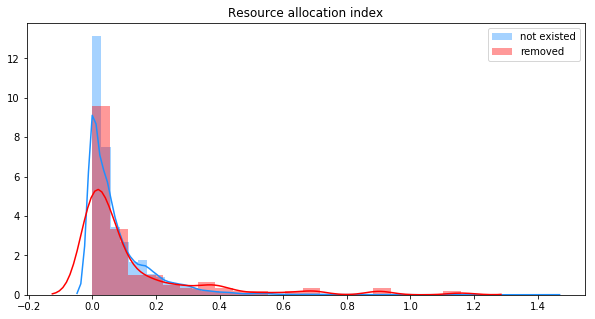

In [89]:
plt.figure(figsize = (10,5))
sns.distplot(resource_alloc_index, color="dodgerblue", label="not existed")
sns.distplot(resource_alloc_index_deleted, color="red", label = 'removed')
plt.title('Resource allocation index')
plt.legend()
plt.show()

Resource allocation index: 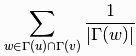

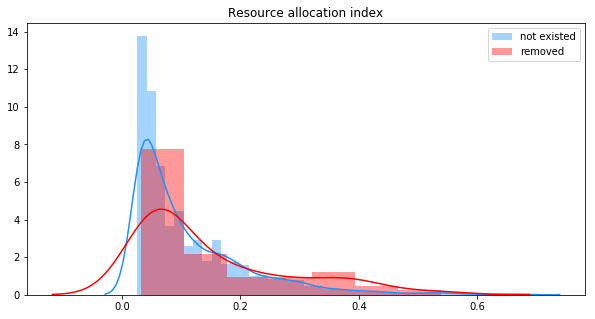

In [90]:
resource_alloc_index_copy = [i for i in resource_alloc_index if i!=0]
resource_alloc_index_copy = [i for i in resource_alloc_index_copy if i<0.7]
resource_alloc_index_deleted_copy = [i for i in resource_alloc_index_deleted if i!=0]
resource_alloc_index_deleted_copy = [i for i in resource_alloc_index_deleted_copy if i<0.6]
plt.figure(figsize = (10,5))
sns.distplot(resource_alloc_index_copy, color="dodgerblue", label="not existed")
sns.distplot(resource_alloc_index_deleted_copy, color="red", label = 'removed')
plt.title('Resource allocation index')
plt.legend()
plt.show()

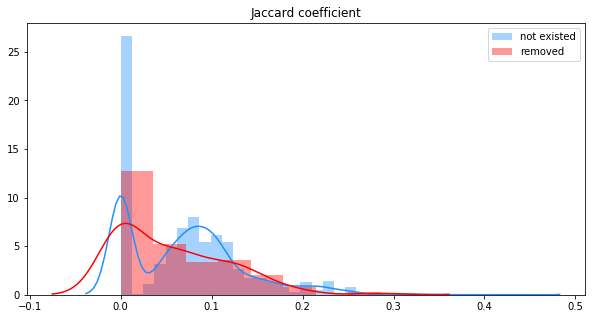

In [91]:
plt.figure(figsize = (10,5))
sns.distplot(jac_coef, color="dodgerblue", label="not existed")
sns.distplot(jac_coef_deleted, color="red", label = 'removed')
plt.title('Jaccard coefficient')
plt.legend()
plt.show()

Jaccard coefficient: 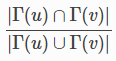
Значение коэффициента пропорционально числу общих вершин; значения коэф. = 0, если общих вершин нет

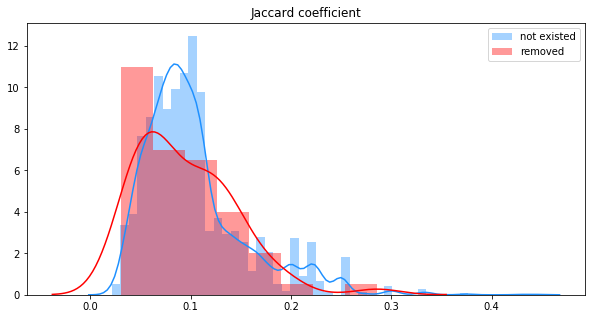

In [92]:
jac_coef_copy = [i for i in jac_coef if i!=0]
jac_coef_deleted_copy = [i for i in jac_coef_deleted if i!=0]
plt.figure(figsize = (10,5))
sns.distplot(jac_coef_copy, color="dodgerblue", label="not existed")
sns.distplot(jac_coef_deleted_copy, color="red", label = 'removed')
plt.title('Jaccard coefficient')
plt.legend()
plt.show()

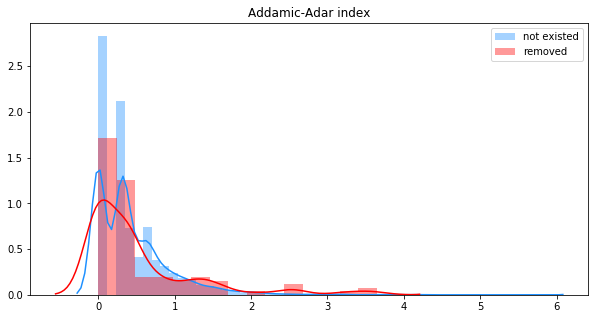

In [93]:
plt.figure(figsize = (10,5))
sns.distplot(aa_index, color="dodgerblue", label="not existed")
sns.distplot(aa_index_deleted, color="red", label = 'removed')
plt.title('Addamic-Adar index')
plt.legend()
plt.show()

Adamic-Adar index: 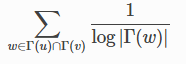

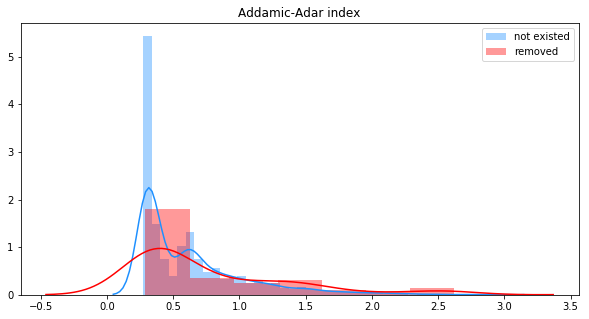

In [94]:
aa_index_copy = [i for i in aa_index if i!=0]
aa_index_copy = [i for i in aa_index_copy if i<3]
aa_index_deleted_copy = [i for i in aa_index_deleted if i!=0]
aa_index_deleted_copy = [i for i in aa_index_deleted_copy if i<3]
plt.figure(figsize = (10,5))
sns.distplot(aa_index_copy, color="dodgerblue", label="not existed")
sns.distplot(aa_index_deleted_copy, color="red", label = 'removed')
plt.title('Addamic-Adar index')
plt.legend()
plt.show()

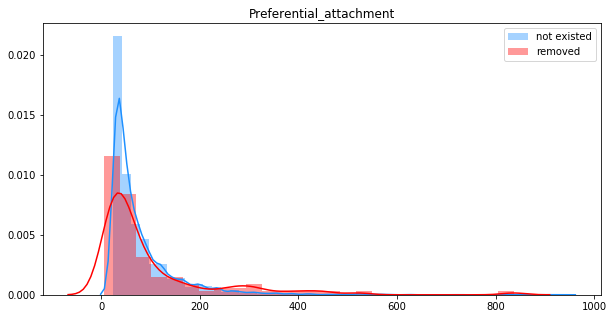

In [95]:
plt.figure(figsize = (10,5))
sns.distplot(pref_attach, color="dodgerblue", label="not existed")
sns.distplot(pref_attach_deleted, color="red", label = 'removed')
plt.title('Preferential_attachment')
plt.legend()
plt.show()

Preferential attachment: 

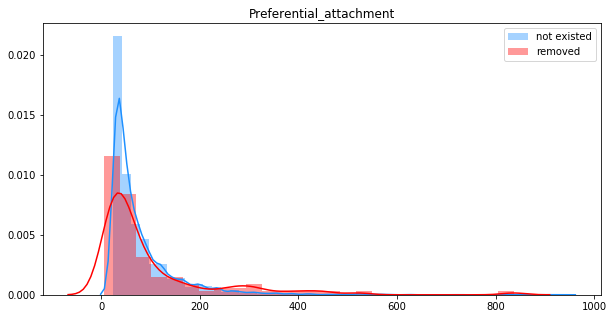

In [96]:
pref_attach_copy = [i for i in pref_attach if i!=0]
pref_attach_deleted_copy = [i for i in pref_attach_deleted if i!=0]
plt.figure(figsize = (10,5))
sns.distplot(pref_attach, color="dodgerblue", label="not existed")
sns.distplot(pref_attach_deleted, color="red", label = 'removed')
plt.title('Preferential_attachment')
plt.legend()
plt.show()

Блочно-стохастическая модель stochatic_block model (симметрическая блочная матрица) - создаем матрицу с двумя блоками (0/1)
блоки = кластеры, высокая вероятность связи между вершинами внутри кластера и низкая между разными
Удаляем ребра из кластеров - смотрим статистику, и делаем link prediction для удаленных связей

In [20]:
#фиксируем размеры матриц и вероятности связей
p1, p2, size = 0.5, 0.05, 100
values_A = np.random.binomial(1, p1, size*size)
values_B = np.random.binomial(1, p1, size*size)
A = values_A.reshape(100,100)
B = values_B.reshape(100,100)
A11 = (A+A.T)//2 #симметричные матрицы
A22 = (B+B.T)//2
# матрицы Z12 Z21 симметричны
values_Z12 = np.random.binomial(1, p2, size*size)
Z12 = values_Z12.reshape(100,100)
Z21 = Z12.T 
#обнуляем диагональ
for i in range(len(A11)):
    A11[i][i] = 0
    A22[i][i] = 0
#собираем матрицы по блокам
SBM = np.bmat([[A11, Z12],[Z21, A22]])

In [21]:
np.sum(SBM)

5914

In [40]:
G = nx.Graph(SBM)
G_A11 = nx.Graph(A11)
G_A22 = nx.Graph(A22)

In [41]:
start_num_nodes = G.number_of_nodes()
start_num_edges = G.number_of_edges()
start_density = nx.density(G)
start_transivity = nx.transitivity(G)
print('Nodes:', start_num_nodes) 
print('Edges:',start_num_edges) 
print('Density:', start_density) 
print('Transitivity:', start_transivity)
lcc_start = len(max(nx.connected_components(G), key=len))
print('Elements in connected component:', lcc_start)

Nodes: 200
Edges: 2957
Density: 0.1485929648241206
Transitivity: 0.19064686218423682
Elements in connected component: 200


In [27]:
def statist(G, nn, number_cc, cc,  max_degree):            
    nn.append(G.number_of_nodes())
    
    nc = nx.number_connected_components(G) 
    number_cc.append(nc)
    len_cc = len(max(nx.connected_components(G), key=len))
    cc.append(len_cc)
    
    degr = [i for node, i in G.degree()]
    max_degree.append (max(degr))   

In [78]:
G_modified = G.copy()
G_mod_A11 = G_A11.copy()
G_mod_A22 = G_A22.copy()

removed_edges = []

connected_component =[]
max_degree = []
nn = []
number_cc =[]

removed_edges = []
for i in range (25):
    #список ребер в кластерах
    edges_A11 = G_mod_A11.edges
    edges_A22 = G_mod_A22.edges

    #создание списка ребер на удаление
    s1 = random.sample(edges_A11, 25)
    s2 = random.sample(edges_A22, 25)
    #s1 = [edges_A11[i] for i in num_s1]
    #s2 = [edges_A22[i] for i in num_s2]
    s1 = s1 + s2
    removed_edges += s1
    
    #удаляем ребра из графа
    G_modified.remove_edges_from(s1) 
    G_modified.remove_edges_from(s2)
    
    #статистика
    statist(G_modified, nn, number_cc, connected_component, max_degree)
    
    #удаляем ребра из блоков-кластеров
    G_mod_A11.remove_edges_from(s1)
    G_mod_A22.remove_edges_from(s2)

In [79]:
len(removed_edges)

1250

Text(0,0.5,'number of connected components')

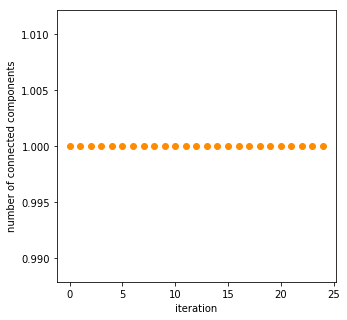

In [80]:
plt.figure(figsize=(5,5))

plt.scatter (np.arange(25), number_cc, c = 'darkorange')#, label = 'nodes in weakly connected component')
#plt.scatter (np.arange(1,25), num_edges_mod, c = 'green', label = 'edges left')
#plt.legend(loc = 'lower left')
plt.xlabel('iteration')
plt.ylabel ('number of connected components')

In [82]:
#среднее и дисперсия для значений link predicton для удаленных связей
G_resource_alloc_index_deleted = []
preds = nx.resource_allocation_index(G, removed_edges)
for u, v, p in preds:
    G_resource_alloc_index_deleted.append(p)
#len(resource_alloc_index)
G_rai_mean_r = np.mean(G_resource_alloc_index_deleted)
G_rai_var_r = np.var(G_resource_alloc_index_deleted)

G_jac_coef_deleted = []
preds = nx.jaccard_coefficient(G, removed_edges)
for u, v, p in preds:
    G_jac_coef_deleted.append(p)
#len(jac_coef)
G_jc_mean_r = np.mean(G_jac_coef_deleted)
G_jc_var_r = np.var(G_jac_coef_deleted)

G_aa_index_deleted = []
preds = nx.adamic_adar_index(G, removed_edges)
for u, v, p in preds:
    G_aa_index_deleted.append(p)
G_aai_mean_r = np.mean(G_aa_index_deleted)
G_aai_var_r = np.var(G_aa_index_deleted)

G_pref_attach_deleted = []
preds = nx.preferential_attachment(G, removed_edges)
for u, v, p in preds:
     G_pref_attach_deleted.append(p)  
G_pa_mean_r = np.mean(G_pref_attach_deleted)
G_pa_var_r = np.var(G_pref_attach_deleted)

In [83]:
G_comp = nx.complement(G)
possible_connections = G_comp.edges

#среднее и дисперсия для значений link predicton для несуществующих связей
G_rai_no_existed = []
preds = nx.resource_allocation_index(G, possible_connections)
for u, v, p in preds:
    G_rai_no_existed.append(p)
#len(resource_alloc_index)
G_rai_mean_ne = np.mean(G_rai_no_existed)
G_rai_var_ne = np.var(G_rai_no_existed)

G_jac_coef_no_existed = []
preds = nx.jaccard_coefficient(G, possible_connections)
for u, v, p in preds:
    G_jac_coef_no_existed.append(p)
#len(jac_coef)
G_jc_mean_ne = np.mean(G_jac_coef_no_existed)
G_jc_var_ne = np.var(G_jac_coef_no_existed)

G_aa_index_no_existed = []
preds = nx.adamic_adar_index(G, possible_connections)
for u, v, p in preds:
    G_aa_index_no_existed.append(p)
G_aai_mean_ne = np.mean(G_aa_index_no_existed)
G_aai_var_ne = np.var(G_aa_index_no_existed)

G_pref_attach_no_existed = []
preds = nx.preferential_attachment(G, possible_connections)
for u, v, p in preds:
     G_pref_attach_no_existed.append(p)  
G_pa_mean_ne = np.mean(G_pref_attach_no_existed)
G_pa_var_ne = np.var(G_pref_attach_no_existed)

In [84]:
print('Resource_allocation_index: ', G_rai_mean_r, '+/-', G_rai_var_r, '|', G_rai_mean_ne, '+/-', G_rai_var_ne)
print('Jaccard_coefficient:      ', G_jc_mean_r, '+/-', G_jc_var_r, '|', G_jc_mean_ne, '+/-', G_jc_var_ne)
print('Adamic_adar_index:        ', G_aai_mean_r, '+/-', G_aai_var_r, '|', G_aai_mean_ne, '+/-', G_aai_var_ne)
print('Preferential_attachment:  ', G_pa_mean_r, '+/-', G_pa_var_r, '|', G_pa_mean_ne, '+/-', G_pa_var_ne)

Resource_allocation_index:  0.20668207085187404 +/- 0.006419339036086658 | 0.13644345952249942 +/- 0.008418249681239208
Jaccard_coefficient:       0.11666595838047605 +/- 0.0019537835750259975 | 0.07741829697574432 +/- 0.0027601787055244373
Adamic_adar_index:         1.834675013682247 +/- 0.50186781798721 | 1.215042023086115 +/- 0.6533007745171182
Preferential_attachment:   901.9984 +/- 41591.37919744 | 865.2377973204273 +/- 45174.1464271142


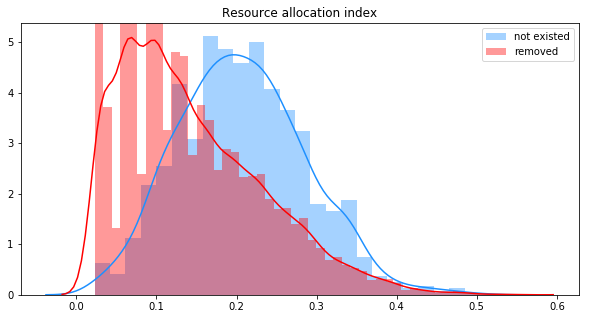

In [104]:
rai_copy_removed = [i for i in G_resource_alloc_index_deleted if i!=0]
rai_copy_no_existed = [i for i in G_rai_no_existed if i!=0]

plt.figure(figsize = (10,5))
sns.distplot(rai_copy_removed, color="dodgerblue", label="removed")
sns.distplot(rai_copy_no_existed, color="red", label = 'not existed')
plt.title('Resource allocation index')
plt.legend()
plt.show()

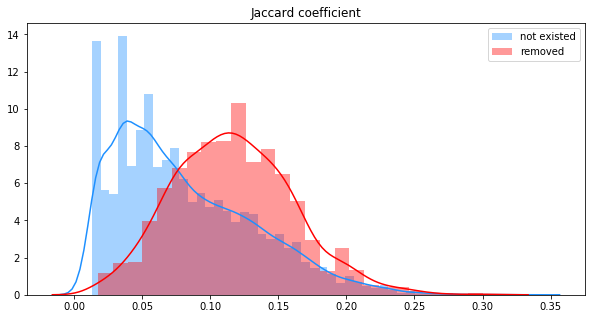

In [100]:
jc_copy_no_existed = [i for i in G_jac_coef_no_existed if i!=0]
jc_copy_removed = [i for i in G_jac_coef_deleted if i!=0]
plt.figure(figsize = (10,5))
sns.distplot(jc_copy_no_existed, color="dodgerblue", label="not existed")
sns.distplot(jc_copy_removed, color="red", label = 'removed')
plt.title('Jaccard coefficient')
plt.legend()
plt.show()

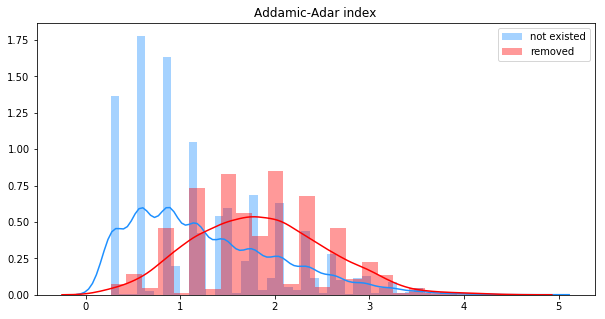

In [101]:
aai_copy_no_existed = [i for i in G_aa_index_no_existed if i!=0]
aai_copy_removed = [i for i in G_aa_index_deleted if i!=0]

plt.figure(figsize = (10,5))
sns.distplot(aai_copy_no_existed, color="dodgerblue", label="not existed")
sns.distplot(aai_copy_removed, color="red", label = 'removed')
plt.title('Addamic-Adar index')
plt.legend()
plt.show()

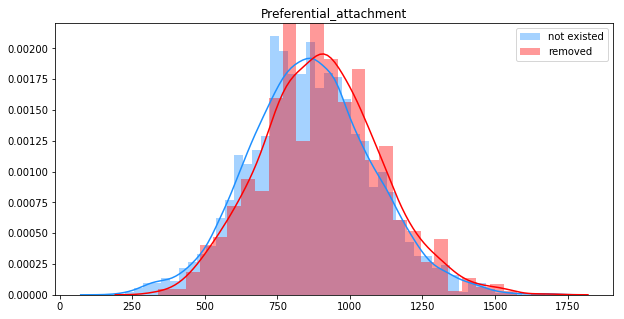

In [102]:
pa_copy_no_existed = [i for i in G_pref_attach_no_existed if i!=0]
pa_copy_removed = [i for i in G_pref_attach_deleted if i!=0]
plt.figure(figsize = (10,5))
sns.distplot(pa_copy_no_existed, color="dodgerblue", label="not existed")
sns.distplot(pa_copy_removed, color="red", label = 'removed')
plt.title('Preferential_attachment')
plt.legend()
plt.show()